In [224]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
from sklearn.metrics import (
    confusion_matrix,
    ConfusionMatrixDisplay,
    accuracy_score, 
    precision_score, 
    recall_score, 
    f1_score, 
    classification_report)

In [225]:
pd.set_option('display.max_rows', 200)

In [226]:
def get_max_emotion_score_df(file, emotion_col, emotion_count_col):
    df = pd.read_csv(file)
    df[emotion_col] = df[['joy','sadness','anger','love','thankfulness','fear']].idxmax(axis=1)
    df[emotion_count_col] = df[emotion_col].groupby(df[emotion_col]).transform(emotion_count_col)
    return df

In [227]:
def display_bar_chart(df, emotion_col, emotion_count_col):
    emotions = df[emotion_col].unique()
    emotions_count = []
    for emotion in emotions:
        emotions_count.append(df[df[emotion_col]==emotion][:1][emotion_count_col].item())
    # for emotion, count in zip(emotions, emotions_count):
    #    print(f"{emotion}: {count}")
    data_tuples = list(zip(emotions, emotions_count))
    df = pd.DataFrame(data_tuples, columns=['emotions','count'])
    plt.figure(figsize=(10,5))
    g = sns.barplot(x='emotions', y='count', data=df.sort_values('emotions'))

## Original Dataset

In [229]:
og_df = pd.read_csv("C://Users/ksriniv2/Downloads/EmmaDataSet.csv")
og_df["count"] = og_df["emotions"].groupby(og_df["emotions"]).transform("count")
og_df.head()

,text,emotions,count
0,"""Sorrow came--a gentle sorrow--but not at all ...",Sadness,19
1,"""It was Miss Taylor's loss which first brought...",Sadness,19
2,"""It was on the wedding-day of this beloved fri...",Sadness,19
3,"""The event had every promise of happiness for ...",Joy,23
4,?Poor Miss Taylor!--I wish she were here again...,Sadness,19


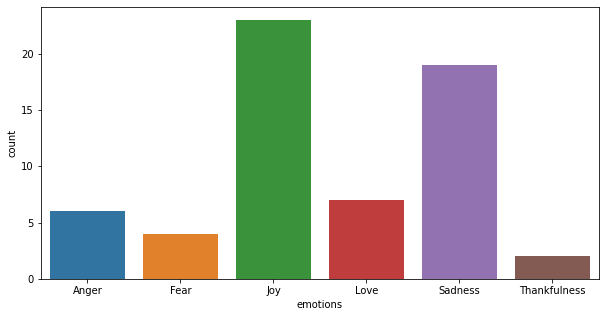

In [230]:
display_bar_chart(og_df, emotion_col="emotions", emotion_count_col="count")

## Predicted Dataset

In [231]:
df = pd.read_csv("C://Users/ksriniv2/Downloads/emmaDatasetResults.csv")
df.head()

,text,joy,sadness,anger,love,thankfulness,fear
0,"""Sorrow came--a gentle sorrow--but not at all ...",0.169,0.991,0.787,0.658,0.985,0.315
1,"""It was Miss Taylor's loss which first brought...",0.701,0.168,0.537,0.552,0.889,0.395
2,"""It was on the wedding-day of this beloved fri...",0.809,0.383,0.838,0.902,0.867,0.108
3,"""The event had every promise of happiness for ...",0.896,0.930,0.526,0.772,0.368,0.244
4,?Poor Miss Taylor!--I wish she were here again...,0.586,0.239,0.131,0.755,0.925,0.191


In [232]:
pred_df = get_max_emotion_score_df(file="C://Users/ksriniv2/Downloads/emmaDatasetResults.csv",
                             emotion_col="emotions",
                             emotion_count_col="count")
pred_df.head()

,text,joy,sadness,anger,love,thankfulness,fear,emotions,count
0,"""Sorrow came--a gentle sorrow--but not at all ...",0.169,0.991,0.787,0.658,0.985,0.315,sadness,8
1,"""It was Miss Taylor's loss which first brought...",0.701,0.168,0.537,0.552,0.889,0.395,thankfulness,23
2,"""It was on the wedding-day of this beloved fri...",0.809,0.383,0.838,0.902,0.867,0.108,love,12
3,"""The event had every promise of happiness for ...",0.896,0.930,0.526,0.772,0.368,0.244,sadness,8
4,?Poor Miss Taylor!--I wish she were here again...,0.586,0.239,0.131,0.755,0.925,0.191,thankfulness,23


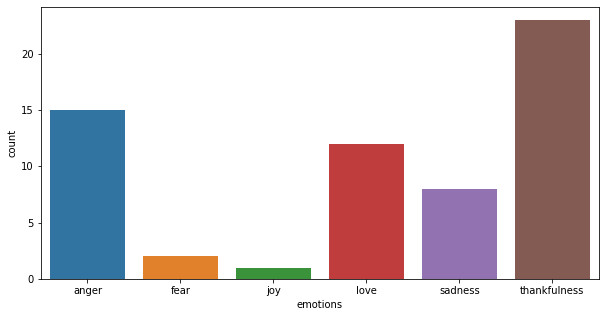

In [233]:
display_bar_chart(pred_df, emotion_col="emotions", emotion_count_col="count")

### Categorize Emotions column (Original dataset)

In [234]:
og_df.dtypes

text        object
emotions    object
count        int64
dtype: object

In [235]:
og_df["emotions"] = og_df["emotions"].astype('category')

In [236]:
category_dict = dict(sorted(zip(og_df.emotions.cat.codes, og_df.emotions)))

In [237]:
for k, v in category_dict.items(): print(k, v)

0 Anger
1 Fear
2 Joy
3 Love
4 Sadness
5 Thankfulness


In [238]:
og_df.dtypes

text          object
emotions    category
count          int64
dtype: object

In [239]:
og_df["emotions_cat"] = og_df["emotions"].cat.codes
og_df.head()

,text,emotions,count,emotions_cat
0,"""Sorrow came--a gentle sorrow--but not at all ...",Sadness,19,4
1,"""It was Miss Taylor's loss which first brought...",Sadness,19,4
2,"""It was on the wedding-day of this beloved fri...",Sadness,19,4
3,"""The event had every promise of happiness for ...",Joy,23,2
4,?Poor Miss Taylor!--I wish she were here again...,Sadness,19,4


### Categorize Emotions column (Predicted dataset)

In [240]:
pred_df.dtypes

text             object
joy             float64
sadness         float64
anger           float64
love            float64
thankfulness    float64
fear            float64
emotions         object
count             int64
dtype: object

In [241]:
pred_df["emotions"] = pred_df["emotions"].astype('category')

In [242]:
category_dict = dict(sorted(zip(pred_df.emotions.cat.codes, pred_df.emotions)))

In [243]:
for k, v in category_dict.items(): print(k, v)

0 anger
1 fear
2 joy
3 love
4 sadness
5 thankfulness


In [244]:
pred_df.dtypes

text              object
joy              float64
sadness          float64
anger            float64
love             float64
thankfulness     float64
fear             float64
emotions        category
count              int64
dtype: object

In [245]:
pred_df["emotions_cat"] = pred_df["emotions"].cat.codes
pred_df.head()

,text,joy,sadness,anger,love,thankfulness,fear,emotions,count,emotions_cat
0,"""Sorrow came--a gentle sorrow--but not at all ...",0.169,0.991,0.787,0.658,0.985,0.315,sadness,8,4
1,"""It was Miss Taylor's loss which first brought...",0.701,0.168,0.537,0.552,0.889,0.395,thankfulness,23,5
2,"""It was on the wedding-day of this beloved fri...",0.809,0.383,0.838,0.902,0.867,0.108,love,12,3
3,"""The event had every promise of happiness for ...",0.896,0.930,0.526,0.772,0.368,0.244,sadness,8,4
4,?Poor Miss Taylor!--I wish she were here again...,0.586,0.239,0.131,0.755,0.925,0.191,thankfulness,23,5


In [246]:
og_df.head()

,text,emotions,count,emotions_cat
0,"""Sorrow came--a gentle sorrow--but not at all ...",Sadness,19,4
1,"""It was Miss Taylor's loss which first brought...",Sadness,19,4
2,"""It was on the wedding-day of this beloved fri...",Sadness,19,4
3,"""The event had every promise of happiness for ...",Joy,23,2
4,?Poor Miss Taylor!--I wish she were here again...,Sadness,19,4


In [247]:
pred_df.head()

,text,joy,sadness,anger,love,thankfulness,fear,emotions,count,emotions_cat
0,"""Sorrow came--a gentle sorrow--but not at all ...",0.169,0.991,0.787,0.658,0.985,0.315,sadness,8,4
1,"""It was Miss Taylor's loss which first brought...",0.701,0.168,0.537,0.552,0.889,0.395,thankfulness,23,5
2,"""It was on the wedding-day of this beloved fri...",0.809,0.383,0.838,0.902,0.867,0.108,love,12,3
3,"""The event had every promise of happiness for ...",0.896,0.930,0.526,0.772,0.368,0.244,sadness,8,4
4,?Poor Miss Taylor!--I wish she were here again...,0.586,0.239,0.131,0.755,0.925,0.191,thankfulness,23,5


## Confusion Matrix

In [248]:
confusion = confusion_matrix(og_df["emotions_cat"], pred_df["emotions_cat"])

In [249]:
confusion

array([[ 2,  0,  0,  1,  0,  3],
       [ 0,  2,  0,  2,  0,  0],
       [ 8,  0,  0,  3,  4,  8],
       [ 4,  0,  1,  1,  0,  1],
       [ 1,  0,  0,  5,  3, 10],
       [ 0,  0,  0,  0,  1,  1]], dtype=int64)

In [250]:
def plot_confusion_matrix(cm, target_names, title='Confusion matrix', cmap=None, normalize=True):
    """
    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix
    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']
    title:        the text to display at the top of the matrix
    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues
    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix by sklearn.metrics.confusion_matrix 
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / np.sum(cm).astype('float')
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(10, 7))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(
        accuracy, misclass))
    plt.show()

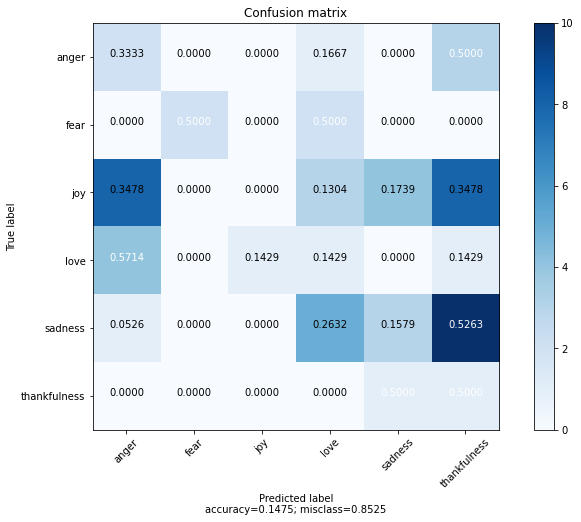

In [251]:
target_names = []
for k, v in category_dict.items(): target_names.append(v)
plot_confusion_matrix(cm=confusion, target_names=target_names, title='Confusion matrix')

### Precision-Recall Report
<div>
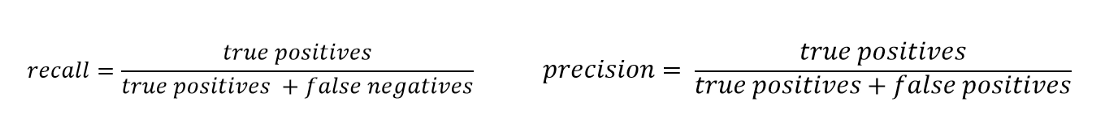
</div>

In [252]:
classes = []
for k, v in category_dict.items(): classes.append(v)
classes

['anger', 'fear', 'joy', 'love', 'sadness', 'thankfulness']

In [253]:
print(classification_report(og_df["emotions_cat"], pred_df["emotions_cat"], target_names=classes))

              precision    recall  f1-score   support

       anger       0.13      0.33      0.19         6
        fear       1.00      0.50      0.67         4
         joy       0.00      0.00      0.00        23
        love       0.08      0.14      0.11         7
     sadness       0.38      0.16      0.22        19
thankfulness       0.04      0.50      0.08         2

    accuracy                           0.15        61
   macro avg       0.27      0.27      0.21        61
weighted avg       0.21      0.15      0.15        61

